In [1]:
#some necessary libraries
import matplotlib.pyplot as plt
import numpy as np
#import dataset from drive
from google.colab import  drive 
import pandas as pd
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
#unraring operation
!unrar x "/content/drive/MyDrive/data.rar" "/content/data/"

In [3]:
df=pd.read_csv("data/data.csv")
print(df.head())
print(df.shape)

   Member_no        Date              item
0       1808  21-07-2015    tropical fruit
1       2552  05-01-2015        whole milk
2       2300  19-09-2015         pip fruit
3       1187  12-12-2015  other vegetables
4       3037  01-02-2015        whole milk
(38765, 3)


Data has 3 columns and 38765 rows.

[Text(0, 0.5, 'Total Number of Items Sold'), Text(0.5, 0, 'Date')]

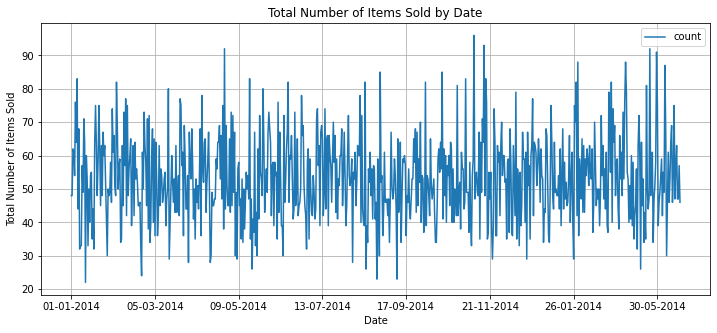

In [4]:
#Let's show the total amount of products sold by dates
df.groupby(['Date'])['item'].agg(['count']).plot(figsize=(12,5),
  grid=True, title="Total Number of Items Sold by Date").set(xlabel="Date", ylabel="Total Number of Items Sold")

[Text(0, 0.5, 'Total Number of Items Sold'), Text(0.5, 0, 'Date')]

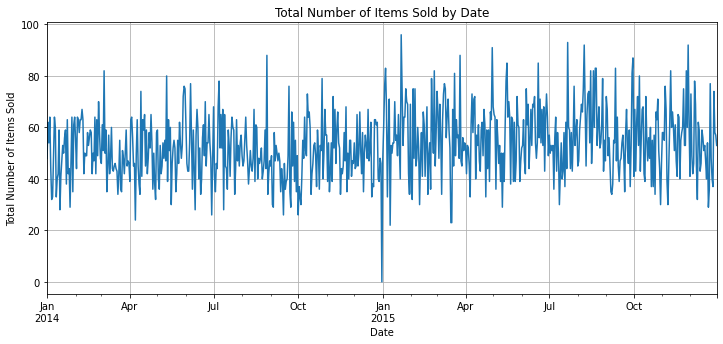

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
d=df.set_index(['Date'])
d.resample("D")['item'].count().plot(figsize=(12,5), grid=True,
  title="Total Number of Items Sold by Date").set(xlabel="Date", ylabel="Total Number of Items Sold")

[Text(0, 0.5, 'Total Number of Items Sold'), Text(0.5, 0, 'Date')]

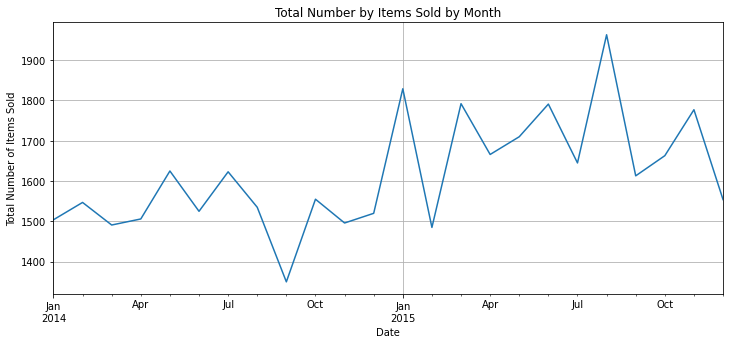

In [6]:
#Let's look at the total amount of products sold by month
d.resample("M")['item'].count().plot(figsize=(12,5), grid=True,
title="Total Number by Items Sold by Month").set(xlabel="Date", ylabel="Total Number of Items Sold")

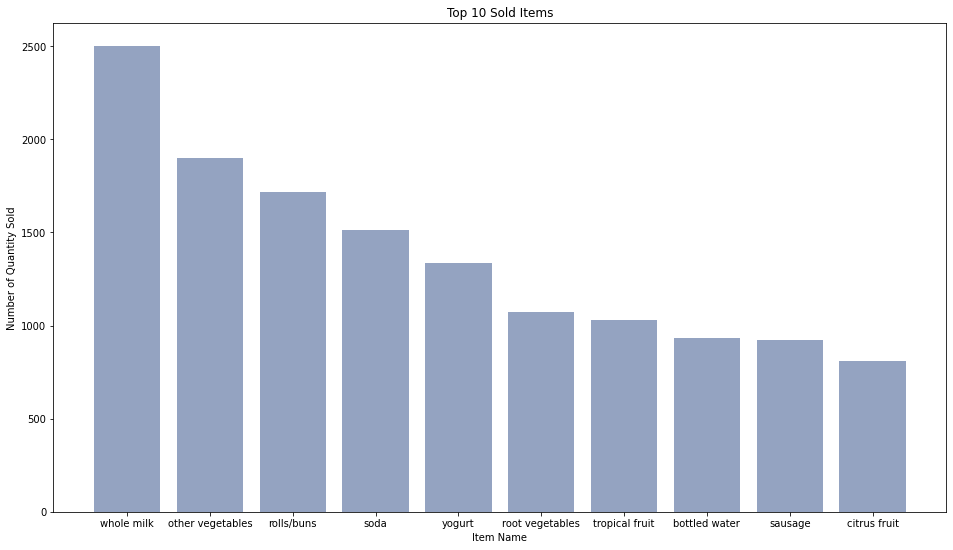

In [7]:
#Let's see what are the 10 best-selling products and how many were sold
Item_distr = df.groupby(by = "item").size().reset_index(name='Frequency').sort_values(by = 'Frequency',ascending=False).head(10)

## Declaring variables

bars = Item_distr["item"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))

## Defining Figure Size
plt.figure(figsize=(16,9))

# Create bars
plt.bar(x_pos, height, color=(0.3, 0.4, 0.6, 0.6))

# Add title and axis names
plt.title("Top 10 Sold Items")
plt.xlabel("Item Name")
plt.ylabel("Number of Quantity Sold")

# Create names on the x-axis
plt.xticks(x_pos, bars)

# Show graph
plt.show()

In [8]:
"""
There are 3 columns in our dataset, the first column is member numbers and integer type.
 We converted the second column from object type to datetime above. Here, we have to convert the item column from object type to string.
 """
df["item"]=df["item"].astype("string")
df.dtypes

Member_no             int64
Date         datetime64[ns]
item                 string
dtype: object

In [9]:
"""
6. Compare the performance of Apriori and the FP-growth algorithm using tables
and graphs.
7. Summarize and interpret your results.
"""
"""
Here, we looked at how many different values ​​the columns have separately and examined the values ​​in the item column.
"""
items=[]
itemset=set()
for i in df.item:
  itemset.add(i)
  items.append(i)
print(items)
print(df.Date.nunique())
print(df.Member_no.unique())

['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables', 'whole milk', 'rolls/buns', 'other vegetables', 'pot plants', 'whole milk', 'tropical fruit', 'citrus fruit', 'beef', 'frankfurter', 'chicken', 'butter', 'fruit/vegetable juice', 'packaged fruit/vegetables', 'chocolate', 'specialty bar', 'other vegetables', 'butter milk', 'whole milk', 'tropical fruit', 'tropical fruit', 'bottled water', 'yogurt', 'sausage', 'other vegetables', 'brown bread', 'yogurt', 'hamburger meat', 'root vegetables', 'pork', 'beef', 'pastry', 'fruit/vegetable juice', 'canned beer', 'root vegetables', 'citrus fruit', 'sausage', 'tropical fruit', 'berries', 'canned beer', 'butter milk', 'coffee', 'pastry', 'rolls/buns', 'misc. beverages', 'root vegetables', 'sausage', 'canned beer', 'ham', 'turkey', 'whole milk', 'whole milk', 'packaged fruit/vegetables', 'rolls/buns', 'ham', 'rolls/buns', 'other vegetables', 'sausage', 'sausage', 'frankfurter', 'rolls/buns', 'whole milk', 'curd cheese', 'red/blush wi

In [10]:
#Here, we wanted to observe the products bought together. That's why we grouped our dataset by date and member number.  
df1=df.groupby(["Member_no","Date"]).sum()
df1.head(10)

item
Member_no Date                                                  
1000      2014-06-24                 whole milkpastrysalty snack
          2015-03-15  sausagewhole milksemi-finished breadyogurt
          2015-05-27                      sodapickled vegetables
          2015-07-24                  canned beermisc. beverages
          2015-11-25                     sausagehygiene articles
1001      2014-07-02                 sausagewhole milkrolls/buns
          2014-12-12                              whole milksoda
          2015-01-20           frankfurtersodawhipped/sour cream
          2015-02-05                             frankfurtercurd
          2015-04-14                             beefwhite bread

Data Cleaning

In [24]:
#Is there any duplicate? If there is, we must remove them
df.drop_duplicates(inplace=True)

In [12]:
#If there is null data, this data is useless, we should delete it.
df.dropna

<bound method DataFrame.dropna of        Member_no       Date                   item
0           1808 2015-07-21         tropical fruit
1           2552 2015-05-01             whole milk
2           2300 2015-09-19              pip fruit
3           1187 2015-12-12       other vegetables
4           3037 2015-01-02             whole milk
...          ...        ...                    ...
38760       4471 2014-08-10          sliced cheese
38761       2022 2014-02-23                  candy
38762       1097 2014-04-16               cake bar
38763       1510 2014-03-12  fruit/vegetable juice
38764       1521 2014-12-26               cat food

[38765 rows x 3 columns]>

In [25]:
#For the apriori and fp-growth algorithms we would apply, we needed to obtain lists of simultaneously received products.
# That's why we saved the lists of products bought together in the list called records.
members=df.Member_no.unique()
items=df.item.unique()
print(members)
records=[];x=0
for i in members:
  dates=df[df["Member_no"]==i].Date.unique()
  for j in dates:
    df1=df[(df["Member_no"]==i) & (df["Date"]==j)]
    records.append(df1.item.values)
#print(records)
print(len(records))

[1808 2552 2300 ... 3607 4587 2417]
14963


In [ ]:
#!pip uninstall mlxtend
#!pip install git+git://github.com/rasbt/mlxtend.git

In [ ]:
#!pip install mlxtend --upgrade

In [27]:
#apriori algorithm
#firstly encoding operations
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df2 = pd.DataFrame(te_ary, columns=te.columns_)
from mlxtend.frequent_patterns import apriori,fpgrowth
#secondly apriori
res=apriori(df2,min_support=0.01,use_colnames=True)
aprioritable = pd.DataFrame (res)
aprioritable

,support,itemsets
0,0.021386,(UHT-milk)
1,0.033950,(beef)
2,0.021787,(berries)
3,0.016574,(beverages)
4,0.045312,(bottled beer)
...,...,...
64,0.010559,"(other vegetables, rolls/buns)"
65,0.014837,"(other vegetables, whole milk)"
66,0.013968,"(rolls/buns, whole milk)"
67,0.011629,"(soda, whole milk)"


When we applied the apriori algorithm, we reached the list of products purchased with 0.01 min support and 69 together.
Just below, we reached the same result in the fp-growth algorithm. These two algorithms are just algorithms that do the same thing, but follow different paths. So it would be silly for us to get different results.

In [ ]:
#!pip install mlxtend -upgrade

In [23]:
#fp-growth algorithm
#from mlxtend.frequent_patterns import fpgrowth
frequent_itemsets = fpgrowth(df2, min_support=0.01,use_colnames=True)

# Print the frequent itemsets
frequent_itemsets

,support,itemsets
0,0.110005,(rolls/buns)
1,0.067767,(tropical fruit)
2,0.014369,(candy)
3,0.017911,(long life bakery product)
4,0.157923,(whole milk)
...,...,...
64,0.013968,"(rolls/buns, whole milk)"
65,0.010559,"(other vegetables, rolls/buns)"
66,0.014837,"(other vegetables, whole milk)"
67,0.011629,"(soda, whole milk)"


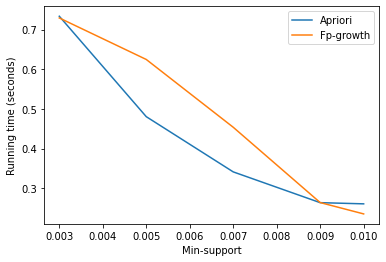

In [33]:
# Import necessary modules
import time
# Define the two algorithms to compare
def apriorispeed(df2,x):
    start_time = time.time()
    res=apriori(df2,min_support=x,use_colnames=True)
    end_time = time.time()
    time1 = end_time - start_time
    return time1

def fpgrowthspeed(df2,x):
    start_time = time.time()
    res=apriori(df2,min_support=x,use_colnames=True)
    end_time = time.time()
    time2 = end_time - start_time
    return time2

# Measure the time it takes for each algorithm to run
supports=[0.01,0.009,0.007,0.005,0.003] #all min_support to try

time1=[]
time2=[]
for i in supports:
  time1.append(apriorispeed(df2,i))
  time2.append(fpgrowthspeed(df2,i))

# Plot the running time of each algorithm on a graph
plt.plot(supports, time1, label="Apriori")
plt.plot(supports, time2, label="Fp-growth")

# Add a legend and label the axes
plt.legend()
plt.xlabel("Min-support")
plt.ylabel("Running time (seconds)")

# Show the plot
plt.show()

Usually apriori algoritm gave results in a shorter time.
In summary;
Apriori and FP-growth are two algorithms commonly used in data mining for finding frequent item sets in a dataset. Both algorithms have their own strengths and weaknesses, and the choice of which algorithm to use depends on the specific characteristics of the dataset.

The Apriori algorithm is a classic algorithm for finding frequent item sets, and it works by iteratively generating candidate item sets and pruning those that do not meet the minimum support threshold. The main advantage of Apriori is that it is easy to understand and implement, and it can handle large datasets by using a bottom-up approach to efficiently count the support for each item set. However, Apriori can be slow for datasets with a large number of items, and it may not be able to find all frequent item sets if the minimum support threshold is set too high.

The FP-growth algorithm is a more recent algorithm that uses a different approach to finding frequent item sets. Instead of iteratively generating and pruning candidate item sets, FP-growth uses a compact data structure called an FP-tree to represent the dataset and identify frequent item sets efficiently. The main advantage of FP-growth is that it is much faster than Apriori, especially for datasets with a large number of items. However, FP-growth is more complex to understand and implement, and it may not be as effective as Apriori for datasets with a large number of transactions.

In summary, the Apriori algorithm is a simple and effective method for finding frequent item sets in a dataset, while the FP-growth algorithm is a more efficient method that is better suited for large datasets. The choice of which algorithm to use depends on the specific characteristics of the dataset and the desired outcome.